In [1]:
import pandas as pd

# Load the CSV (replace 'yourfile.csv' with your file name)
data = pd.read_csv('emails.csv')

# View the first few rows
data.head()


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [2]:
# Check column names and data types
data.info()

# Check for missing values
data.isnull().sum()

# Optional: Drop unnecessary columns if they exist
# Example: if there are unnamed columns
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [3]:
# Drop rows with missing values if needed
data = data.dropna()

# Remove duplicates
data = data.drop_duplicates()


In [4]:
data = data.drop(columns=['Email No.'])


In [5]:
data.head()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0


In [6]:
X = data.drop(columns=['Prediction'])   # Features (word counts)
y = data['Prediction']                  # Labels (0 or 1)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [8]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

Accuracy: 0.9545893719806763
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       739
           1       0.89      0.96      0.92       296

    accuracy                           0.95      1035
   macro avg       0.94      0.96      0.95      1035
weighted avg       0.96      0.95      0.96      1035



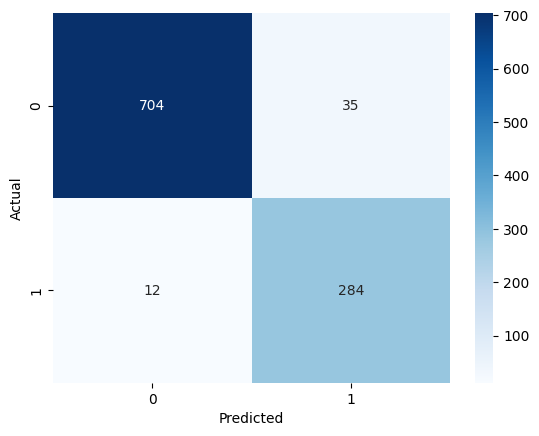

In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [11]:
import re
# Preprocess the text email
def clean_real_email(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text
#Convert text to feature vector
def email_to_feature_vector(email_text, feature_columns):
    cleaned_email = clean_real_email(email_text)
    words = cleaned_email.split()
    word_freq = {word: words.count(word) for word in words}
    
    # Create feature vector for all feature columns (fill 0 if not present)
    feature_vector = {col: word_freq.get(col, 0) for col in feature_columns}
    return pd.DataFrame([feature_vector])


In [12]:
# Example: your real email text
real_email_text =input("Enter your Email Text")

# Get feature vector
feature_columns = X_train.columns  # columns used in training
real_email_features = email_to_feature_vector(real_email_text, feature_columns)

# Predict
prediction = model.predict(real_email_features)
print("The email is:", "Spam" if prediction[0] == 1 else "Not Spam")


Enter your Email Text You are cordially invited to the lecture session on "Probabilistic Mixture Model" scheduled for tomorrow at 7:00 pm(1.5 hours duration).  The particulars of which are appended below.  Date: 15th March 2025 (Saturday) Time: 7.00 to 8.30 pm Speaker: Dr. Monalisa Patra Topic: Probabilistic Mixture Mode


The email is: Not Spam
